Source
https://www.kaggle.com/faressayah/practical-introduction-to-10-regression-algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
from datetime import datetime
%matplotlib inline

# sns.set_style("whitegrid")
# plt.style.use("fivethirtyeight")

In [2]:
# Pembacaan File Data Polusi Udara ISPU Excel
DKI1 = pd.read_excel("./Data/Normalization/DATA ISPU - Normalization.xlsx", sheet_name="DKI1")
DKI2 = pd.read_excel("./Data/Normalization/DATA ISPU - Normalization.xlsx", sheet_name="DKI2")
DKI3 = pd.read_excel("./Data/Normalization/DATA ISPU - Normalization.xlsx", sheet_name="DKI3")
DKI4 = pd.read_excel("./Data/Normalization/DATA ISPU - Normalization.xlsx", sheet_name="DKI4")
DKI5 = pd.read_excel("./Data/Normalization/DATA ISPU - Normalization.xlsx", sheet_name="DKI5")

In [3]:
DKI1.head()

,Tanggal,Wilayah,PM10,SO2,CO,O3,NO2,Max,Critical,Kategori
0,2017-01-01,DKI1 (Bunderan HI),0.719512,0.314286,0.458333,0.092308,0.012821,0.300518,PM10,Sedang
1,2017-01-02,DKI1 (Bunderan HI),0.146341,0.295238,0.270833,0.082051,0.000000,0.139896,SO2,Baik
2,2017-01-03,DKI1 (Bunderan HI),0.170732,0.295238,0.291667,0.087179,0.012821,0.139896,SO2,Baik
3,2017-01-04,DKI1 (Bunderan HI),0.243902,0.295238,0.395833,0.087179,0.012821,0.139896,SO2,Baik
4,2017-01-05,DKI1 (Bunderan HI),0.304878,0.295238,0.458333,0.056410,0.012821,0.139896,SO2,Baik


In [4]:
DKI1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Tanggal   1765 non-null   datetime64[ns]
 1   Wilayah   1765 non-null   object        
 2   PM10      1765 non-null   float64       
 3   SO2       1765 non-null   float64       
 4   CO        1765 non-null   float64       
 5   O3        1765 non-null   float64       
 6   NO2       1765 non-null   float64       
 7   Max       1765 non-null   float64       
 8   Critical  1731 non-null   object        
 9   Kategori  1765 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 138.0+ KB


In [5]:
DKI1.describe()

,PM10,SO2,CO,O3,NO2,Max
count,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000
mean,0.544504,0.164027,0.297723,0.209920,0.146655,0.283110
std,0.169490,0.100511,0.154844,0.129358,0.136786,0.111834
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.439024,0.104762,0.187500,0.112821,0.038462,0.212435
50%,0.585366,0.161905,0.297600,0.179487,0.115385,0.279793
75%,0.658537,0.200000,0.375000,0.287179,0.192308,0.347150
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
DKI1.columns

Index(['Tanggal', 'Wilayah', 'PM10', 'SO2', 'CO', 'O3', 'NO2', 'Max',
       'Critical', 'Kategori'],
      dtype='object')

Exploratory Data Analysis (EDA)

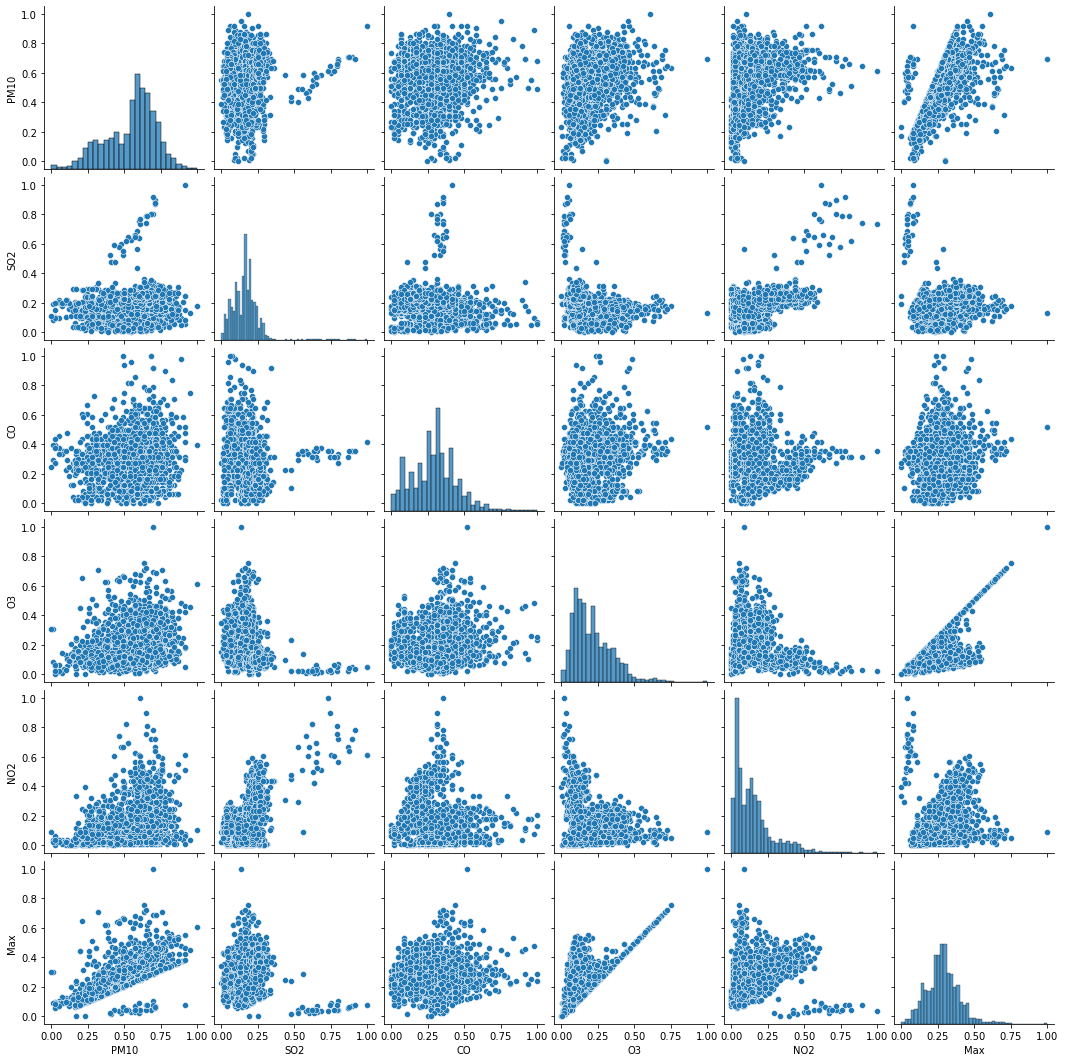

In [7]:
sns.pairplot(DKI1)

In [26]:
DKI1.hvplot.hist(by="Tanggal", subplots=False, width=1000)

:NdOverlay   [Element]
   :Histogram   [Max]   (Max_count)

In [9]:
DKI1.hvplot.hist("Tanggal")

:Histogram   [Tanggal]   (Tanggal_count)

In [10]:
DKI1.hvplot.scatter(x='Tanggal', y='PM10')

:Scatter   [Tanggal]   (PM10)

In [11]:
DKI1.hvplot.scatter(x='Tanggal', y='SO2')

:Scatter   [Tanggal]   (SO2)

In [12]:
DKI1.columns

Index(['Tanggal', 'Wilayah', 'PM10', 'SO2', 'CO', 'O3', 'NO2', 'Max',
       'Critical', 'Kategori'],
      dtype='object')

<AxesSubplot:>

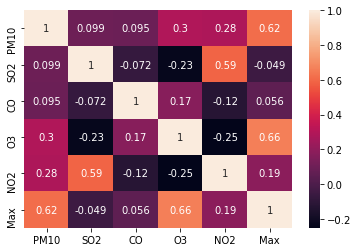

In [13]:
sns.heatmap(DKI1.corr(), annot=True)

Training a Linear Regression Model

In [14]:
DKI1.columns

Index(['Tanggal', 'Wilayah', 'PM10', 'SO2', 'CO', 'O3', 'NO2', 'Max',
       'Critical', 'Kategori'],
      dtype='object')

X and y arrays

In [15]:
# X = DKI1[['SO2', 'CO', 'O3', 'NO2']]
X = DKI1[['Tanggal']]
y = DKI1['PM10']

Train test split

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

📦 Preparing Data For Linear Regression

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

✔️ Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

✔️ Model Evaluation

In [20]:
# print the intercept
print(lin_reg.intercept_)

0.5415278387488766


In [21]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Tanggal,0.034121


✔️ Predictions from our Model

In [22]:
pred = lin_reg.predict(X_test)

In [23]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

Residual Histogram

In [24]:
pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

✔️ Regression Evaluation Metrics

In [25]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 0.13098244113243304
MSE: 0.027199602786747584
RMSE: 0.16492302079075433
R2 Square 0.003935049410240143
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.13497680950894386
MSE: 0.02811924775682439
RMSE: 0.16768794755981836
R2 Square 0.039757231036275265
__________________________________


TypeError: The DTypes <class 'numpy.dtype[float64]'> and <class 'numpy.dtype[datetime64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

In [ ]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.114476,0.021213,0.145645,0.223185,-0.207347
